# Running Data Report

This notebook breaks down the running data of mice in the Functional Connectivity dataset provided by the Allen Institute. There are a given number of sessions which include presentations, optogenetic stimulation, and spontaneous activity. Spiking data from individual units is recorded along with running speed throughout the entire session.

First load some relevant packages.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

print('Packages Imported')

Packages Imported


Then we establish the proper data directory and take a look at the available sessions.

In [2]:
PROJECT_PATH = 'C:\\Users\\User\\visual_encoding'
data_directory = f'{PROJECT_PATH}\\data\\manifest_files'
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()
sessions = sessions[sessions.get('session_type')=='functional_connectivity']
sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
766640955,2019-10-03T00:00:00Z,744912849,functional_connectivity,133.0,M,wt/wt,842,2233,6,"[MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP..."
767871931,2019-10-03T00:00:00Z,753795610,functional_connectivity,135.0,M,wt/wt,713,2231,6,"[MRN, APN, MB, DG, CA1, VISrl, nan, VISam, PO,..."
768515987,2019-10-03T00:00:00Z,754477358,functional_connectivity,136.0,M,wt/wt,802,2217,6,"[MB, APN, NOT, DG, CA1, VISam, nan, Eth, LP, P..."
771160300,2019-10-03T00:00:00Z,754488979,functional_connectivity,142.0,M,wt/wt,930,2230,6,"[SCig, PPT, NOT, SUB, ProS, CA1, VISam, nan, A..."
771990200,2019-10-03T00:00:00Z,756578435,functional_connectivity,108.0,M,wt/wt,546,2229,6,"[APN, MB, DG, CA1, VISam, nan, PO, LP, VISpm, ..."
774875821,2019-10-03T00:00:00Z,759711152,functional_connectivity,114.0,M,wt/wt,649,2233,6,"[APN, LP, DG, CA1, VISrl, nan, MGv, MGd, CA3, ..."
778240327,2019-10-03T00:00:00Z,760938797,functional_connectivity,120.0,M,wt/wt,784,2234,6,"[APN, POL, LP, DG, CA1, VISrl, nan, ZI, IntG, ..."
778998620,2019-10-03T00:00:00Z,759674770,functional_connectivity,121.0,M,wt/wt,793,2229,6,"[APN, POL, LP, DG, CA3, CA1, VISrl, nan, ZI, M..."
779839471,2019-10-03T00:00:00Z,760960653,functional_connectivity,122.0,M,wt/wt,863,2220,6,"[APN, LP, MB, DG, CA1, VISrl, nan, TH, LGd, CA..."


In [3]:
sessions.shape[0]

26

We have a total of 26 sessions with running speed data that appears as follows.

In [4]:
session_id = 766640955
session=cache.get_session_data(session_id)
run_data=session.running_speed
run_data

,start_time,end_time,velocity
0,15.23815,15.25348,11.329609
1,15.25348,15.26977,13.034279
2,15.28652,15.30318,10.286983
3,15.30318,15.31987,16.165972
4,15.33641,15.35340,14.631257
...,...,...,...
372368,9352.90703,9352.92275,-1.481451
372369,9352.93867,9352.95532,4.099186
372370,9352.97222,9352.98882,-0.928090
372371,9352.98882,9353.00552,0.293277


In order to obtain a single data point for each measurement of velocity, we take the midpoint of each start and end time and it to the DataFrame.

In [5]:
run_data=run_data.assign(mid_time=(run_data.get('start_time')+run_data.get('end_time'))/2)
run_data

,start_time,end_time,velocity,mid_time
0,15.23815,15.25348,11.329609,15.245815
1,15.25348,15.26977,13.034279,15.261625
2,15.28652,15.30318,10.286983,15.294850
3,15.30318,15.31987,16.165972,15.311525
4,15.33641,15.35340,14.631257,15.344905
...,...,...,...,...
372368,9352.90703,9352.92275,-1.481451,9352.914890
372369,9352.93867,9352.95532,4.099186,9352.946995
372370,9352.97222,9352.98882,-0.928090,9352.980520
372371,9352.98882,9353.00552,0.293277,9352.997170


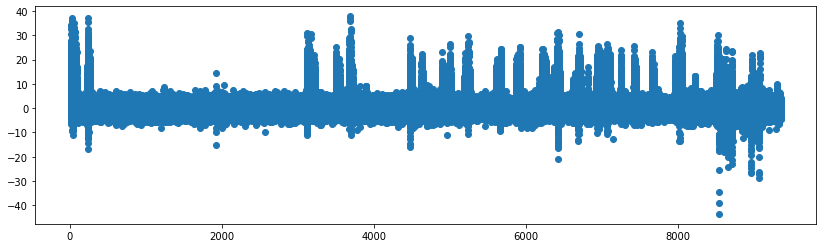

In [6]:
t=np.array(run_data.get('mid_time'))
x=np.array(run_data.get('velocity'))
fig, ax =plt.subplots(figsize=[14,4])
ax.scatter(t,x)

Next, we implement scipy's one-dimensional interpolate function to infer a uniformly distributed velocity/time series for the entire session.

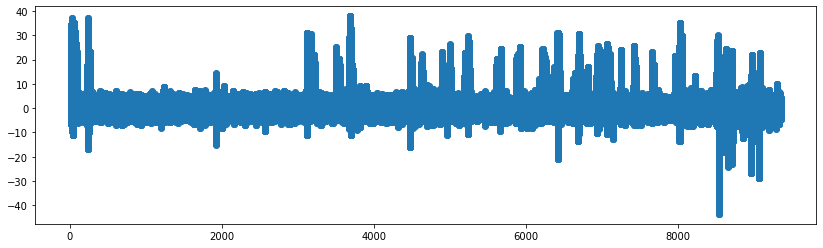

In [7]:
from scipy import interpolate

fs = 2500
model = interpolate.interp1d(t, x)
time = np.arange(t[0], t[-1], 1/fs)
velocity = model(time)

fig, ax =plt.subplots(figsize=[14,4])
ax.scatter(time,velocity)

For our final step in the preprocessing of the data, we isolate the timeframe we desire (spontaneous action) and apply a median filter to smooth out the data.

In [8]:
"""
KERNEL_SIZE = 501

stimuli_df = session.stimulus_presentations
stimuli_df = stimuli_df[stimuli_df.get('stimulus_name')=='spontaneous'].get(['start_time','stop_time'])

stimuli_df = stimuli_df.assign(diff=stimuli_df.get('stop_time')-stimuli_df.get('start_time')).sort_values(by='diff',ascending=False)
start_time = stimuli_df.get('start_time').iloc[0]
stop_time = stimuli_df.get('stop_time').iloc[0]

# epoch data
epoch_mask = (time>start_time) & (time<stop_time)
spont_time = time[epoch_mask]
spont_speed = velocity[epoch_mask]

# apply a median filter
spont_speed_filt = signal.medfilt(spont_speed, [KERNEL_SIZE])
"""

"\nKERNEL_SIZE = 501\n\nstimuli_df = session.stimulus_presentations\nstimuli_df = stimuli_df[stimuli_df.get('stimulus_name')=='spontaneous'].get(['start_time','stop_time'])\n\nstimuli_df = stimuli_df.assign(diff=stimuli_df.get('stop_time')-stimuli_df.get('start_time')).sort_values(by='diff',ascending=False)\nstart_time = stimuli_df.get('start_time').iloc[0]\nstop_time = stimuli_df.get('stop_time').iloc[0]\n\n# epoch data\nepoch_mask = (time>start_time) & (time<stop_time)\nspont_time = time[epoch_mask]\nspont_speed = velocity[epoch_mask]\n\n# apply a median filter\nspont_speed_filt = signal.medfilt(spont_speed, [KERNEL_SIZE])\n"

Now, we can look at different distributions of running speed during the session's spontaneous timeframe. For the purposes of this analysis, we chose a threshold of 5 to denote running vs stationary activity.

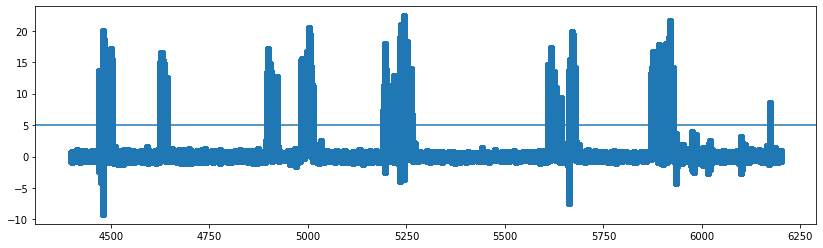

In [9]:
threshold = 5
series_data = np.load(f'{PROJECT_PATH}\\data\\behavior\\running\\running_{session_id}_spont.npz')
spon_time, speed = series_data['time'],series_data['velocity']
fig, ax =plt.subplots(figsize=[14,4])
ax.scatter(spon_time, speed)
ax.axhline(threshold)

In [18]:
running_speeds_matrix = []
for session_id in sessions.index:
    series_data = np.load(f'{PROJECT_PATH}\\data\\behavior\\running\\running_{session_id}_spont.npz')
    speed = series_data['velocity']
    running_speeds_matrix.append(speed)

#print(running_speeds_matrix)

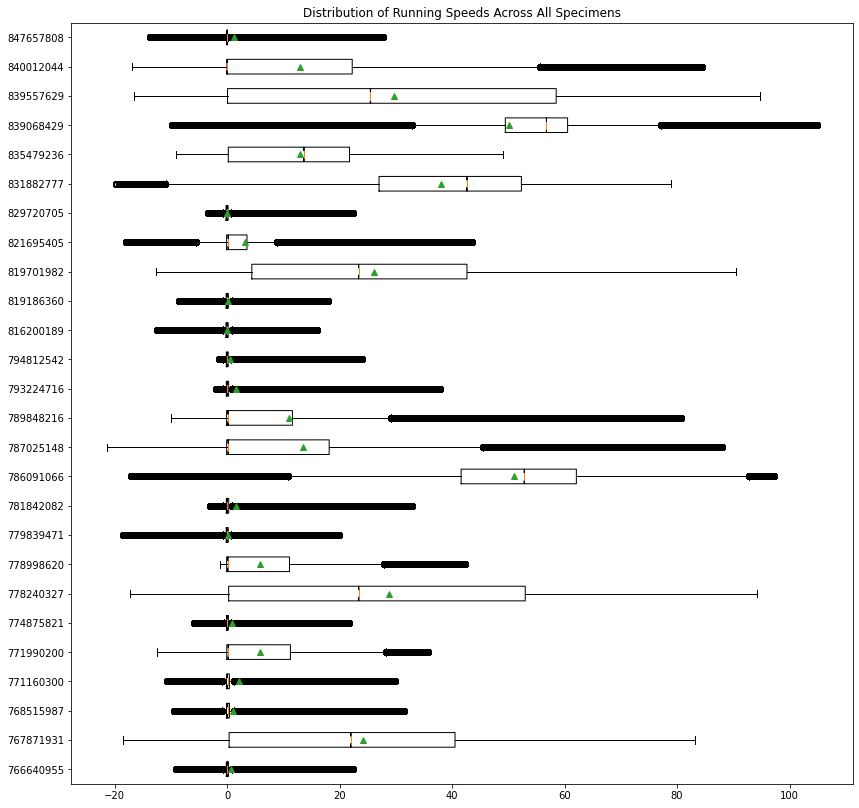

In [22]:
plt.figure(figsize=(14,14))
plt.boxplot(running_speeds_matrix, labels=sessions.index, vert=False, notch=True, showmeans=True)
plt.title("Distribution of Running Speeds Across All Specimens");

In [50]:
run_proportions = []
stationary_proportions = []
labels = [str(ses_id) for ses_id in sessions.index]
for run_series in running_speeds_matrix:
    run_pro = len(run_series[run_series>threshold])/len(run_series)
    run_proportions.append(run_pro)
    stationary_proportions.append(1-run_pro)

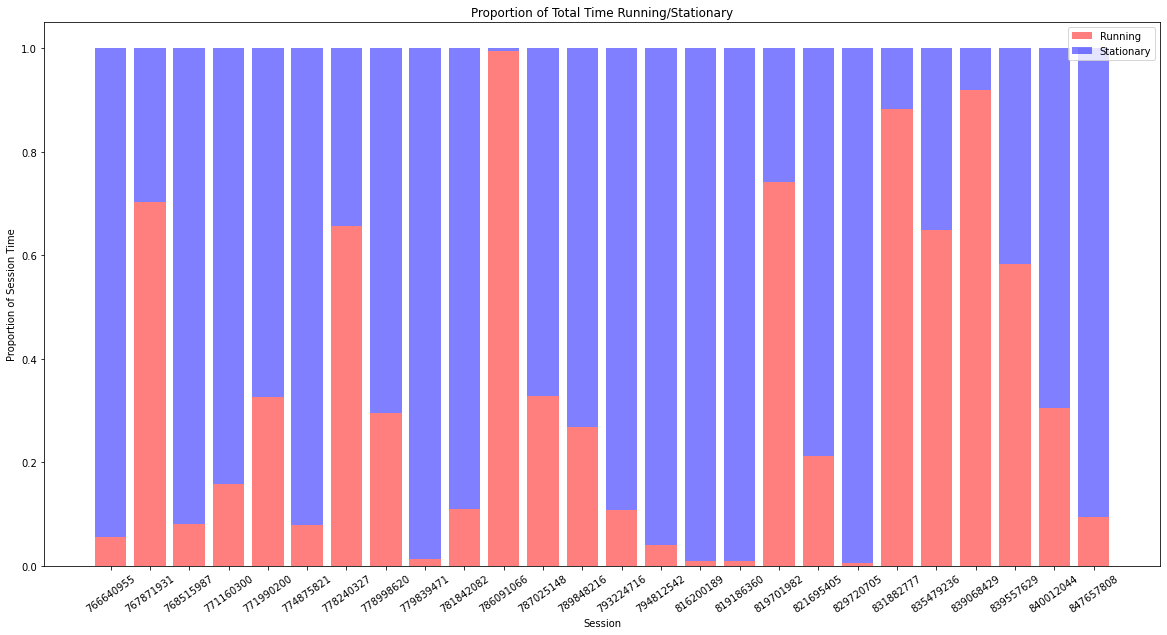

In [59]:
fig = plt.figure(figsize = (20, 10))

plt.bar(labels, run_proportions,label='Running',color='red',alpha=0.5)
plt.bar(labels, stationary_proportions, bottom=run_proportions,label='Stationary',color='blue',alpha=0.5)

plt.xlabel("Session")
plt.ylabel("Proportion of Session Time")
plt.xticks(rotation=30)
plt.legend()
plt.title("Proportion of Total Time Running/Stationary")
 
plt.show()

In [88]:
import sys
sys.path.append(PROJECT_PATH+'/code')
from Valid_Epochs import get_epochs

def get_valid_epochs(start_times, stop_times, epoch_length):
    if len(start_times)==len(stop_times):
        iter_length = min(len(start_times),len(stop_times))-1
    else:
        iter_length = min(len(start_times),len(stop_times))

    #Identify all valid running/stationary epochs for each entered epoch length
    positive_epochs = []
    negative_epochs = []

    if start_times[0]>stop_times[0]:
        for i in range(iter_length):
                positive_epochs.append([start_times[i],stop_times[i+1]])
                negative_epochs.append([stop_times[i],start_times[i]])
    else:
        for i in range(iter_length):
            positive_epochs.append([start_times[i],stop_times[i]])
            negative_epochs.append([stop_times[i],start_times[i+1]])
            
    return positive_epochs, negative_epochs

run_epoch_matrix = []
sta_epoch_matrix = []

for session_id in sessions.index:
    series_data = np.load(f'{PROJECT_PATH}\\data\\behavior\\running\\running_{session_id}_spont.npz')
    spon_time, speed = series_data['time'],series_data['velocity']
    start_times, stop_times = get_epochs(spon_time,speed,threshold)
    valid_run_epochs, valid_sta_epochs = get_valid_epochs(start_times, stop_times, 0)
    #print(valid_sta_epochs) #Doesn't work
    run_epoch_matrix.append([(e[1]-e[0]) for e in valid_run_epochs])
    sta_epoch_matrix.append([(e[1]-e[0]) for e in valid_sta_epochs])

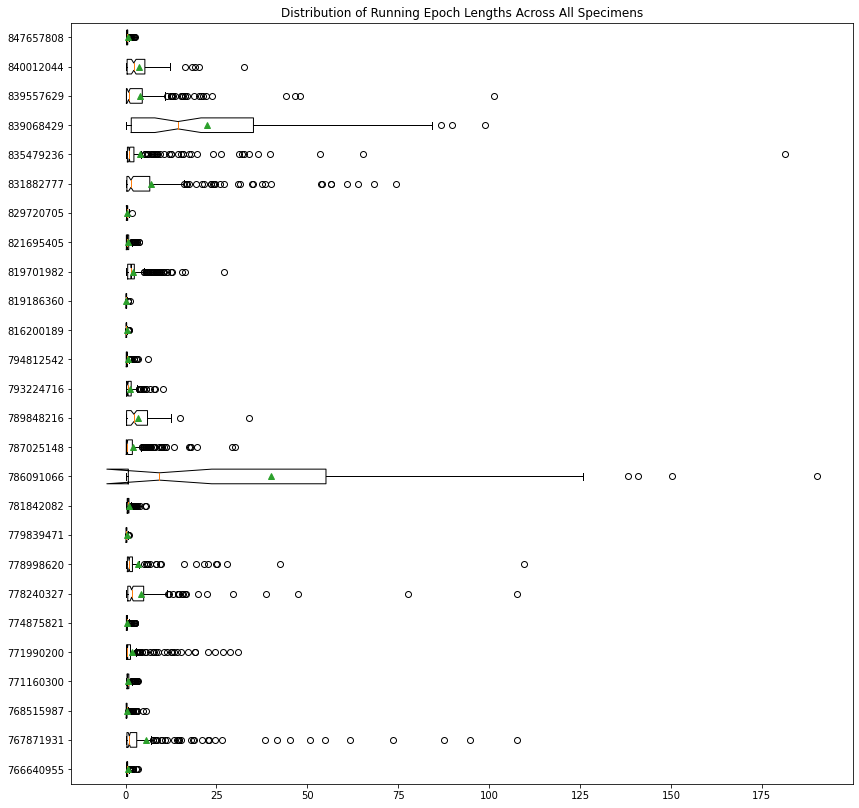

In [89]:
plt.figure(figsize=(14,14))
plt.boxplot(run_epoch_matrix, labels=sessions.index, vert=False, notch=True, showmeans=True)
plt.title("Distribution of Running Epoch Lengths Across All Specimens");

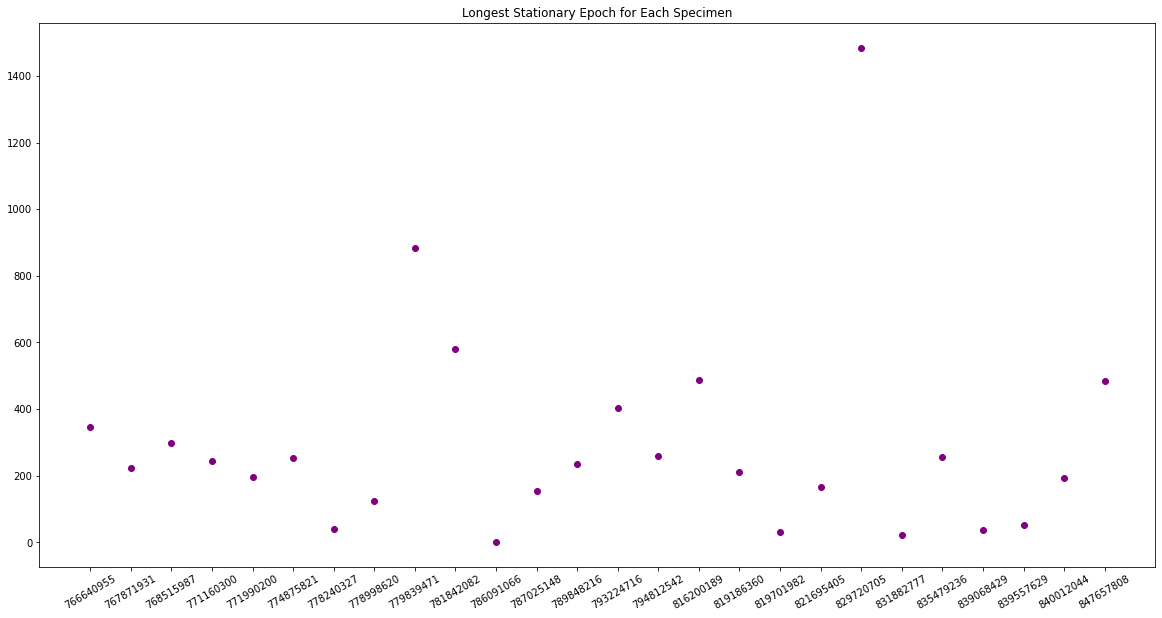

In [94]:
fig = plt.figure(figsize = (20, 10))
plt.title("Longest Stationary Epoch for Each Specimen")
plt.xticks(rotation=30)
plt.scatter(labels,[max(epoch_lengths) for epoch_lengths in sta_epoch_matrix],color='purple');

## Challenges

Coding:
- Accounting for animals that start running vs. stationary 
- Median filter is time consuming

General:
- Varying amount running/stationary epochs per specimen that leave gaps in data when filtering based on larger epoch lengths